# Finite Elements (1D)

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()

## Building a basis Φ of test and ansatz functions

### Template for basis functions f0

f0:
⎧  0     for x < -1
⎪                  
⎪x + 1   for x < 0 
⎨                  
⎪-x + 1  for x ≤ 1 
⎪                  
⎩  0     otherwise 


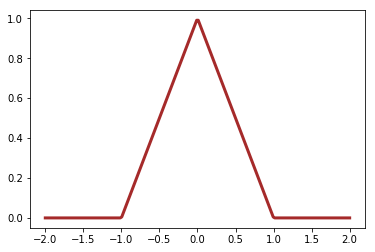

In [2]:
x = sp.Symbol('x')
f0 = sp.Piecewise((0,x<-1),(x+1,x<0),(1-x,x<=1),(0,True))
sp.pprint('f0:')
sp.pprint(f0)
lam_f0 = sp.lambdify((x), f0)
plt.figure()
xa = np.linspace(-2,2,200)
f0a = [lam_f0(xae) for xae in xa]
plt.plot(xa,f0a,color='brown',linewidth=3)
plt.show()

### Now, specify mesh width h and position x0

In [4]:
n = 7
h = sp.Matrix(1,n,[sp.Rational(1,n+1) for i in range(1,n+1)])
x0 = sp.Matrix(1,n,[sp.Rational(i,(n+1)) for i in range(1,n+1)])
print('x0 =', sp.pretty(x0))
print('h =', sp.pretty(h))

x0 = [1/8  1/4  3/8  1/2  5/8  3/4  7/8]
h = [1/8  1/8  1/8  1/8  1/8  1/8  1/8]


### Define the basis functions

In [5]:
phi = [f0.subs(x,(x-x0[i])/h[i]) for i in range(0,n)]
sp.pprint(phi[0])

⎧   0      for 8⋅x - 1 < -1
⎪                          
⎪  8⋅x     for 8⋅x - 1 < 0 
⎨                          
⎪-8⋅x + 2  for 8⋅x - 1 ≤ 1 
⎪                          
⎩   0         otherwise    


### Plot the basis functions

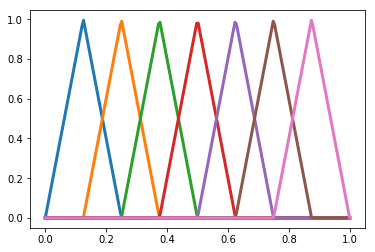

In [8]:
lam_phi = [sp.lambdify((x), phie) for phie in phi]
xa = np.linspace(0,1,200)
plt.figure()
for lam_phie in lam_phi:
    phia = [lam_phie(xae) for xae in xa]
    plt.plot(xa,phia,linewidth=3)
plt.show()

## Stiffness matrix and mass matrix

### Stiffness matrix A

Stiffness matrix: $A_{ij} = \int_0^1 \frac{\partial \phi_i}{\partial x} \frac{\partial \phi_j}{\partial x} \mathrm{d}x$.

In [9]:
from scipy import integrate
#A = [[sp.integrate(diff(phiI)*diff(phiJ),x) for phiI in phi] for phiJ in phi]
# sympy 'sometimes' incorrectly integrates piecewise functions!
A = [[integrate.quad(sp.lambdify(x,sp.diff(phiI)*sp.diff(phiJ)),0.,1.0)[0] for phiI in phi] for phiJ in phi]
A = sp.Matrix(A)
sp.pprint(A)

⎡16.0  -8.0  0.0   0.0   0.0   0.0   0.0 ⎤
⎢                                        ⎥
⎢-8.0  16.0  -8.0  0.0   0.0   0.0   0.0 ⎥
⎢                                        ⎥
⎢0.0   -8.0  16.0  -8.0  0.0   0.0   0.0 ⎥
⎢                                        ⎥
⎢0.0   0.0   -8.0  16.0  -8.0  0.0   0.0 ⎥
⎢                                        ⎥
⎢0.0   0.0   0.0   -8.0  16.0  -8.0  0.0 ⎥
⎢                                        ⎥
⎢0.0   0.0   0.0   0.0   -8.0  16.0  -8.0⎥
⎢                                        ⎥
⎣0.0   0.0   0.0   0.0   0.0   -8.0  16.0⎦


### Mass matrix B

Mass matrix: $B_{ij} = \int_0^1 \phi_i \phi_j \mathrm{d}x$.

In [10]:
B = [[integrate.quad(sp.lambdify(x,phiI*phiJ),0.,1.0)[0] for phiI in phi] for phiJ in phi]
B = sp.Matrix(B)
sp.pprint(B)

⎡0.0833333333333333  0.0208333333333333         0.0                 0.0       
⎢                                                                             
⎢0.0208333333333333  0.0833333333333333  0.0208333333333333         0.0       
⎢                                                                             
⎢       0.0          0.0208333333333333  0.0833333333333333  0.020833333333333
⎢                                                                             
⎢       0.0                 0.0          0.0208333333333333  0.083333333333333
⎢                                                                             
⎢       0.0                 0.0                 0.0          0.020833333333333
⎢                                                                             
⎢       0.0                 0.0                 0.0                 0.0       
⎢                                                                             
⎣       0.0                 0.0                 0.0 

## A very simple example

We solve the (embarrassingly simple) equation $u = x(1-x)$ using the bilinear form $b(u,v) = \int_0^1 u(x) v(x) \mathrm{d}x $
The result uh in Vh minimises the L2 norm of uh Kx 1 Kx .


In [11]:
bb = x*(1-x)
b = sp.Matrix(n,1,[integrate.quad(sp.lambdify(x,phiI*bb),0.,1.)[0] for phiI in phi])
sp.pprint(b)

⎡0.0133463541666667⎤
⎢                  ⎥
⎢0.0231119791666667⎥
⎢                  ⎥
⎢0.0289713541666667⎥
⎢                  ⎥
⎢0.0309244791666667⎥
⎢                  ⎥
⎢0.0289713541666667⎥
⎢                  ⎥
⎢0.0231119791666667⎥
⎢                  ⎥
⎣0.0133463541666667⎦


### Solution

In [12]:
u = B.LUsolve(b)
sp.pprint(u)

⎡0.112677190721649⎤
⎢                 ⎥
⎢0.189916237113402⎥
⎢                 ⎥
⎢0.237032860824742⎥
⎢                 ⎥
⎢0.252577319587629⎥
⎢                 ⎥
⎢0.237032860824742⎥
⎢                 ⎥
⎢0.189916237113402⎥
⎢                 ⎥
⎣0.11267719072165 ⎦


$B$ is the system matrix, $b$ the right hand side.

The respective piecewise linear function $uu$ is obtained as a linear combination of the basis functions $bs$

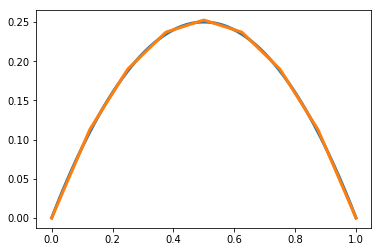

In [14]:
uu = u.dot(phi)
lam_uu = sp.lambdify(x, uu)
lam_bb = sp.lambdify(x, bb)
xa = np.linspace(0,1,200)
plt.figure()
lam_uua = [lam_uu(xae) for xae in xa]
lam_bba = [lam_bb(xae) for xae in xa]
plt.plot(xa,lam_bba,linewidth=3)
plt.plot(xa,lam_uua,linewidth=3)
plt.show()

The difference between $bb$ and the approximation $uu$

200 200


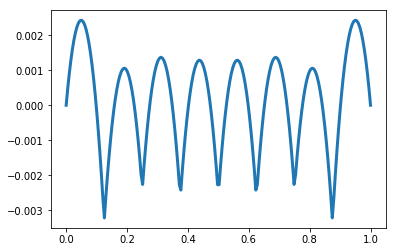

In [16]:
dbbuu = [lam_bba[i]-lam_uua[i] for i in range(0,len(lam_bba))]
print(len(dbbuu), len(xa))
plt.figure()
plt.plot(xa,dbbuu,linewidth=3)
plt.show()

## Poisson's equation in 1D

For Poisson's equation, $A$ (the stiffness matrix) is the system matrix.

We can retain $x(1-x)$ as the right hand side (thus solving the equation $-u^{''} = x(1-x)$ ), so $b$ is still our right hand side of the Linear System.

The equation can still be solved exactly:

In [17]:
usol = -x**3/6 + x**4/12 + x/12
sp.pprint(-sp.diff(sp.diff(usol)))
sp.pprint(usol.subs(x,0.0).evalf())
sp.pprint(usol.subs(x,1.0).evalf())

   2    
- x  + x
0
0


Use parabolic function as right-hand side:

In [18]:
bb = x*(1-x)
b = sp.Matrix(n,1,[integrate.quad(sp.lambdify(x,phiI*bb),0.,1.)[0] for phiI in phi])
sp.pprint(b)

⎡0.0133463541666667⎤
⎢                  ⎥
⎢0.0231119791666667⎥
⎢                  ⎥
⎢0.0289713541666667⎥
⎢                  ⎥
⎢0.0309244791666667⎥
⎢                  ⎥
⎢0.0289713541666667⎥
⎢                  ⎥
⎢0.0231119791666667⎥
⎢                  ⎥
⎣0.0133463541666667⎦


The FE solution, however, is:

In [19]:
u = A.LUsolve(b)
sp.pprint(u)

⎡0.0101114908854167⎤
⎢                  ⎥
⎢   0.0185546875   ⎥
⎢                  ⎥
⎢ 0.02410888671875 ⎥
⎢                  ⎥
⎢0.0260416666666667⎥
⎢                  ⎥
⎢ 0.02410888671875 ⎥
⎢                  ⎥
⎢   0.0185546875   ⎥
⎢                  ⎥
⎣0.0101114908854167⎦


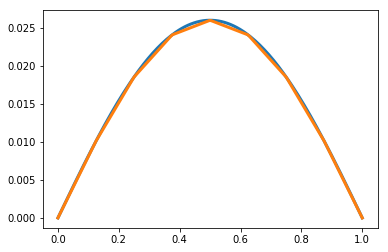

In [20]:
uu = u.dot(phi)
lam_uu = sp.lambdify(x, uu)
lam_usol = sp.lambdify(x, usol)
xa = np.linspace(0,1,200)
plt.figure()
lam_uua = [lam_uu(xae) for xae in xa]
lam_usol = [lam_usol(xae) for xae in xa]
plt.plot(xa,lam_usol,linewidth=3)
plt.plot(xa,lam_uua,linewidth=3)
plt.show()